<a href="https://colab.research.google.com/github/farahdbah/kmeans-clustering-zakat-distribution/blob/main/ICONZ8th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Library

In [ ]:
# basic library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# scaling library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression library
from sklearn import linear_model

# geo data library
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# import data library
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Data

In [ ]:
# read dataset
df = pd.read_csv ('/content/drive/My Drive/ICONZ/Data_ICONZ.csv', encoding='unicode_escape')

In [ ]:
# quick view of columns and values
df.head()

,Nama Provinsi,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp)
0,Aceh,807,2.62,3.47,1581.30,2.29,70.385,41424
1,Sumatera Utara,1240,1.23,3.10,1641.00,1.86,70.030,68306
2,Sumatera Barat,340,0.74,2.84,1586.05,2.22,70.240,54327
3,Riau,486,0.97,2.55,2112.70,1.99,72.285,154522
4,Jambi,281,1.06,2.99,2101.60,2.50,71.820,79836


In [ ]:
# standard statistical measures
df.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp)
count,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000
mean,761.823529,1.625294,3.848235,1865.198529,2.09000,70.751912,81948.411765
std,1063.094610,1.007365,2.204561,444.845092,0.62296,2.422573,61906.962048
min,48.000000,0.500000,1.640000,934.300000,1.02000,66.055000,23078.000000
25%,190.250000,0.830000,2.535000,1582.487500,1.72500,69.282500,48235.000000
50%,346.500000,1.310000,2.980000,1778.150000,2.09000,70.892500,64109.500000
75%,821.250000,2.095000,4.707500,2264.025000,2.37750,72.253750,77369.250000
90%,1210.300000,3.034000,6.357000,2423.980000,2.64700,73.993500,154419.100000
95%,3825.950000,3.620000,7.927500,2490.730000,2.83150,74.786750,206653.200000
99%,4090.000000,4.237800,10.645700,2700.117500,3.82800,75.074750,287353.180000


3. Data Distribution

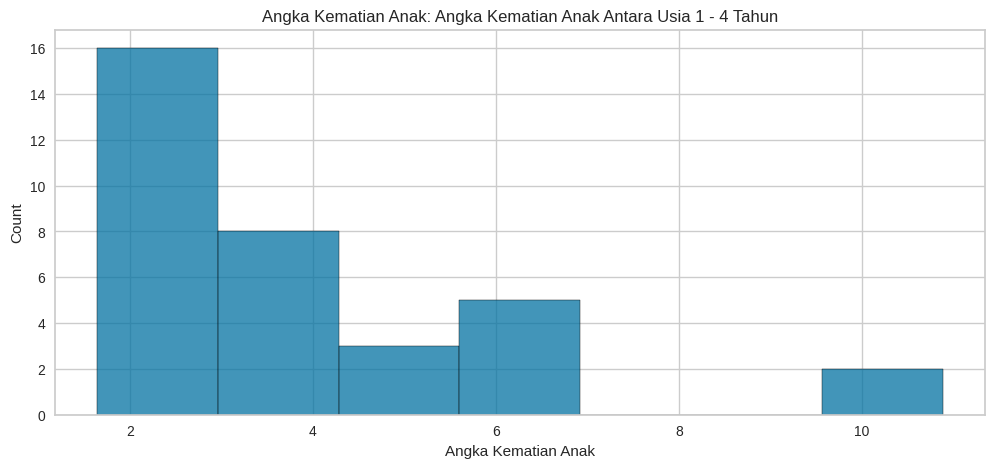

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Angka Kematian Anak: Angka Kematian Anak Antara Usia 1 - 4 Tahun")
ax = sns.histplot(df["Angka Kematian Anak"])

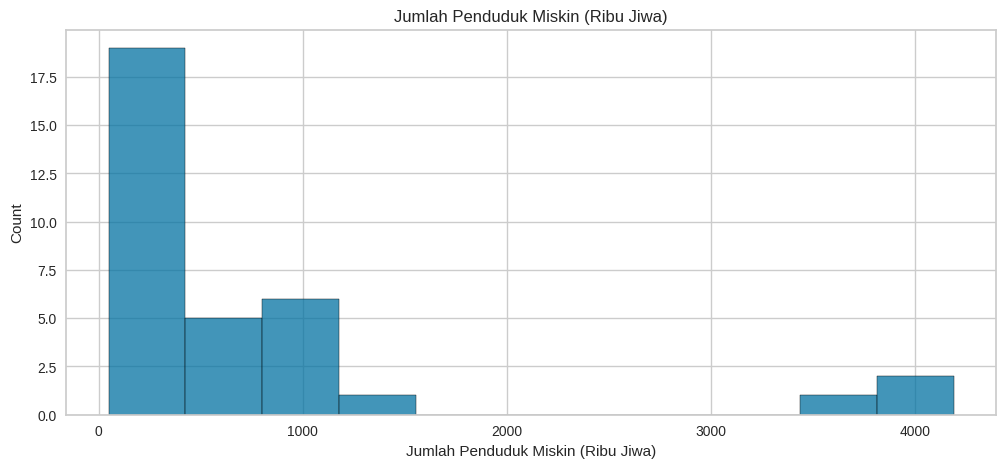

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Jumlah Penduduk Miskin (Ribu Jiwa)")
ax = sns.histplot(df["Jumlah Penduduk Miskin (Ribu Jiwa)"])

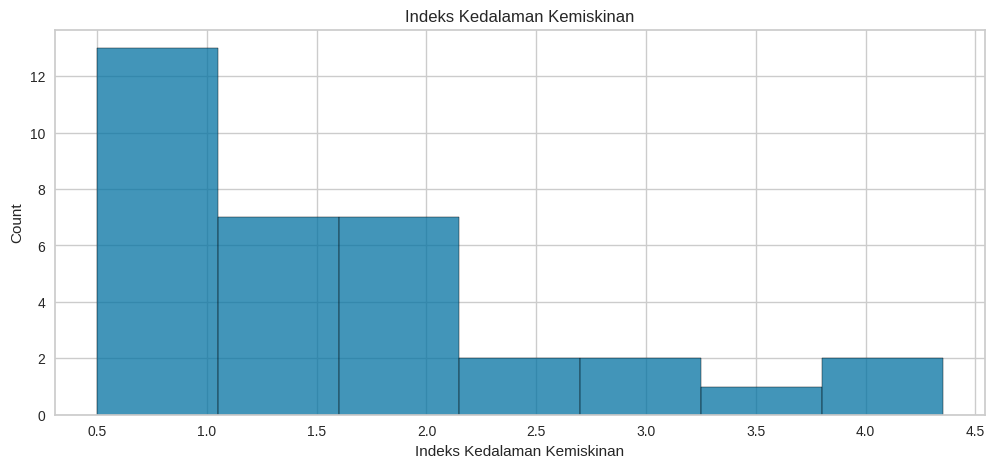

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Indeks Kedalaman Kemiskinan")
ax = sns.histplot(df["Indeks Kedalaman Kemiskinan"])

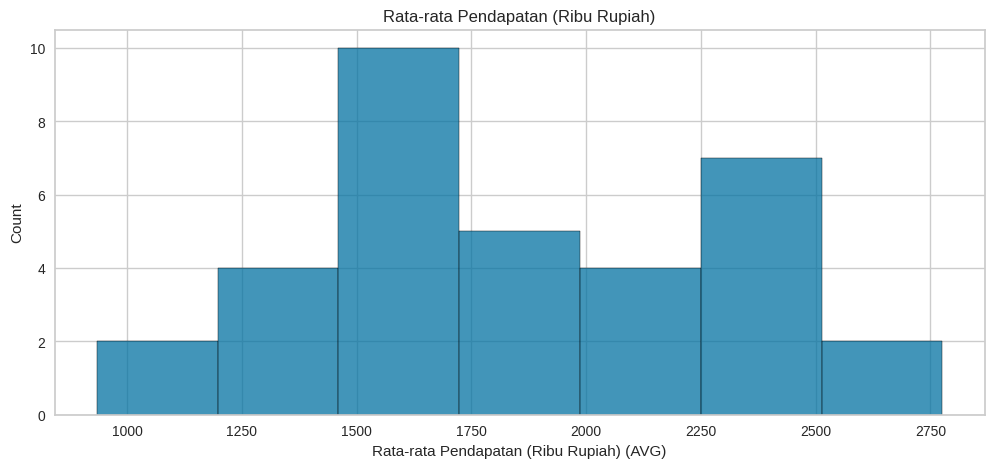

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Rata-rata Pendapatan (Ribu Rupiah)")
ax = sns.histplot(df["Rata-rata Pendapatan (Ribu Rupiah) (AVG)"])

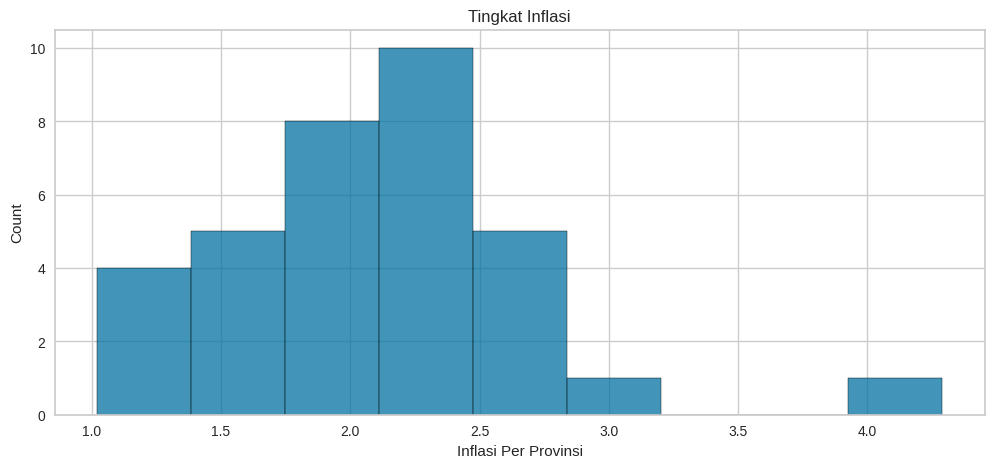

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Tingkat Inflasi")
ax = sns.histplot(df["Inflasi Per Provinsi"])

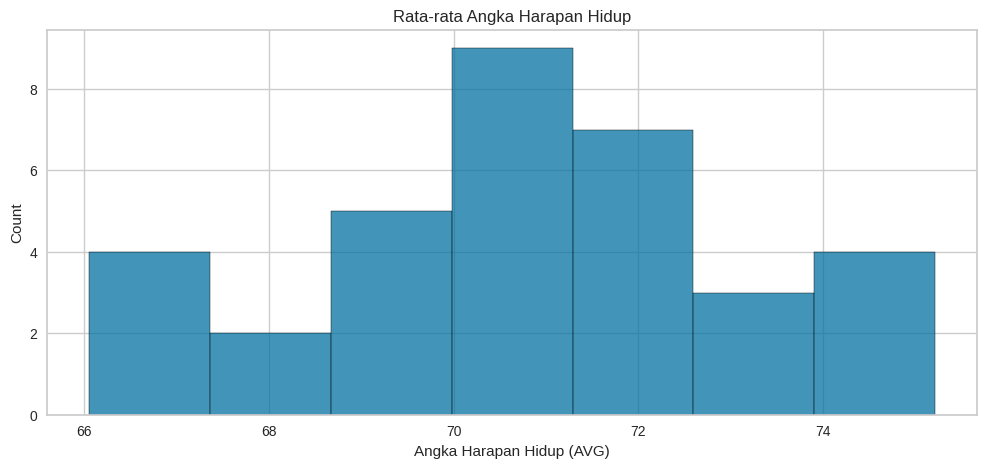

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Rata-rata Angka Harapan Hidup")
ax = sns.histplot(df["Angka Harapan Hidup (AVG)"])

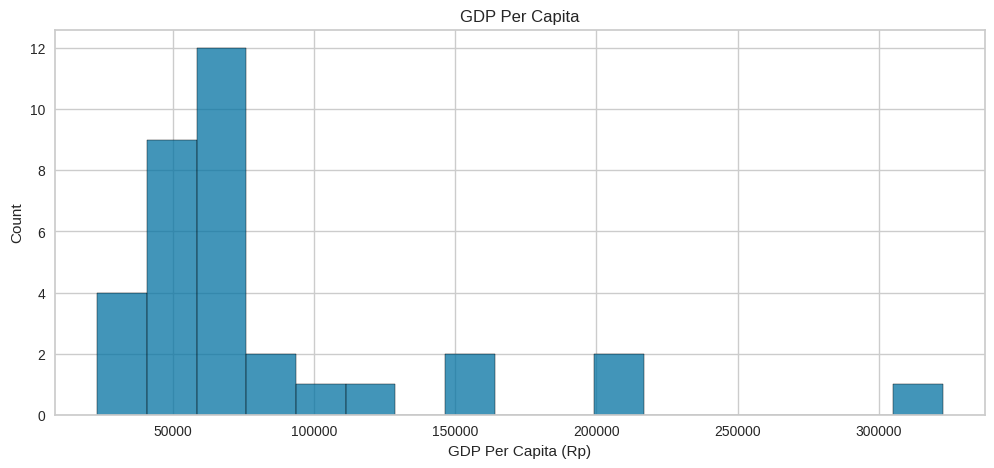

In [ ]:
plt.figure(figsize=(12,5))
plt.title("GDP Per Capita")
ax = sns.histplot(df["GDP Per Capita (Rp)"])

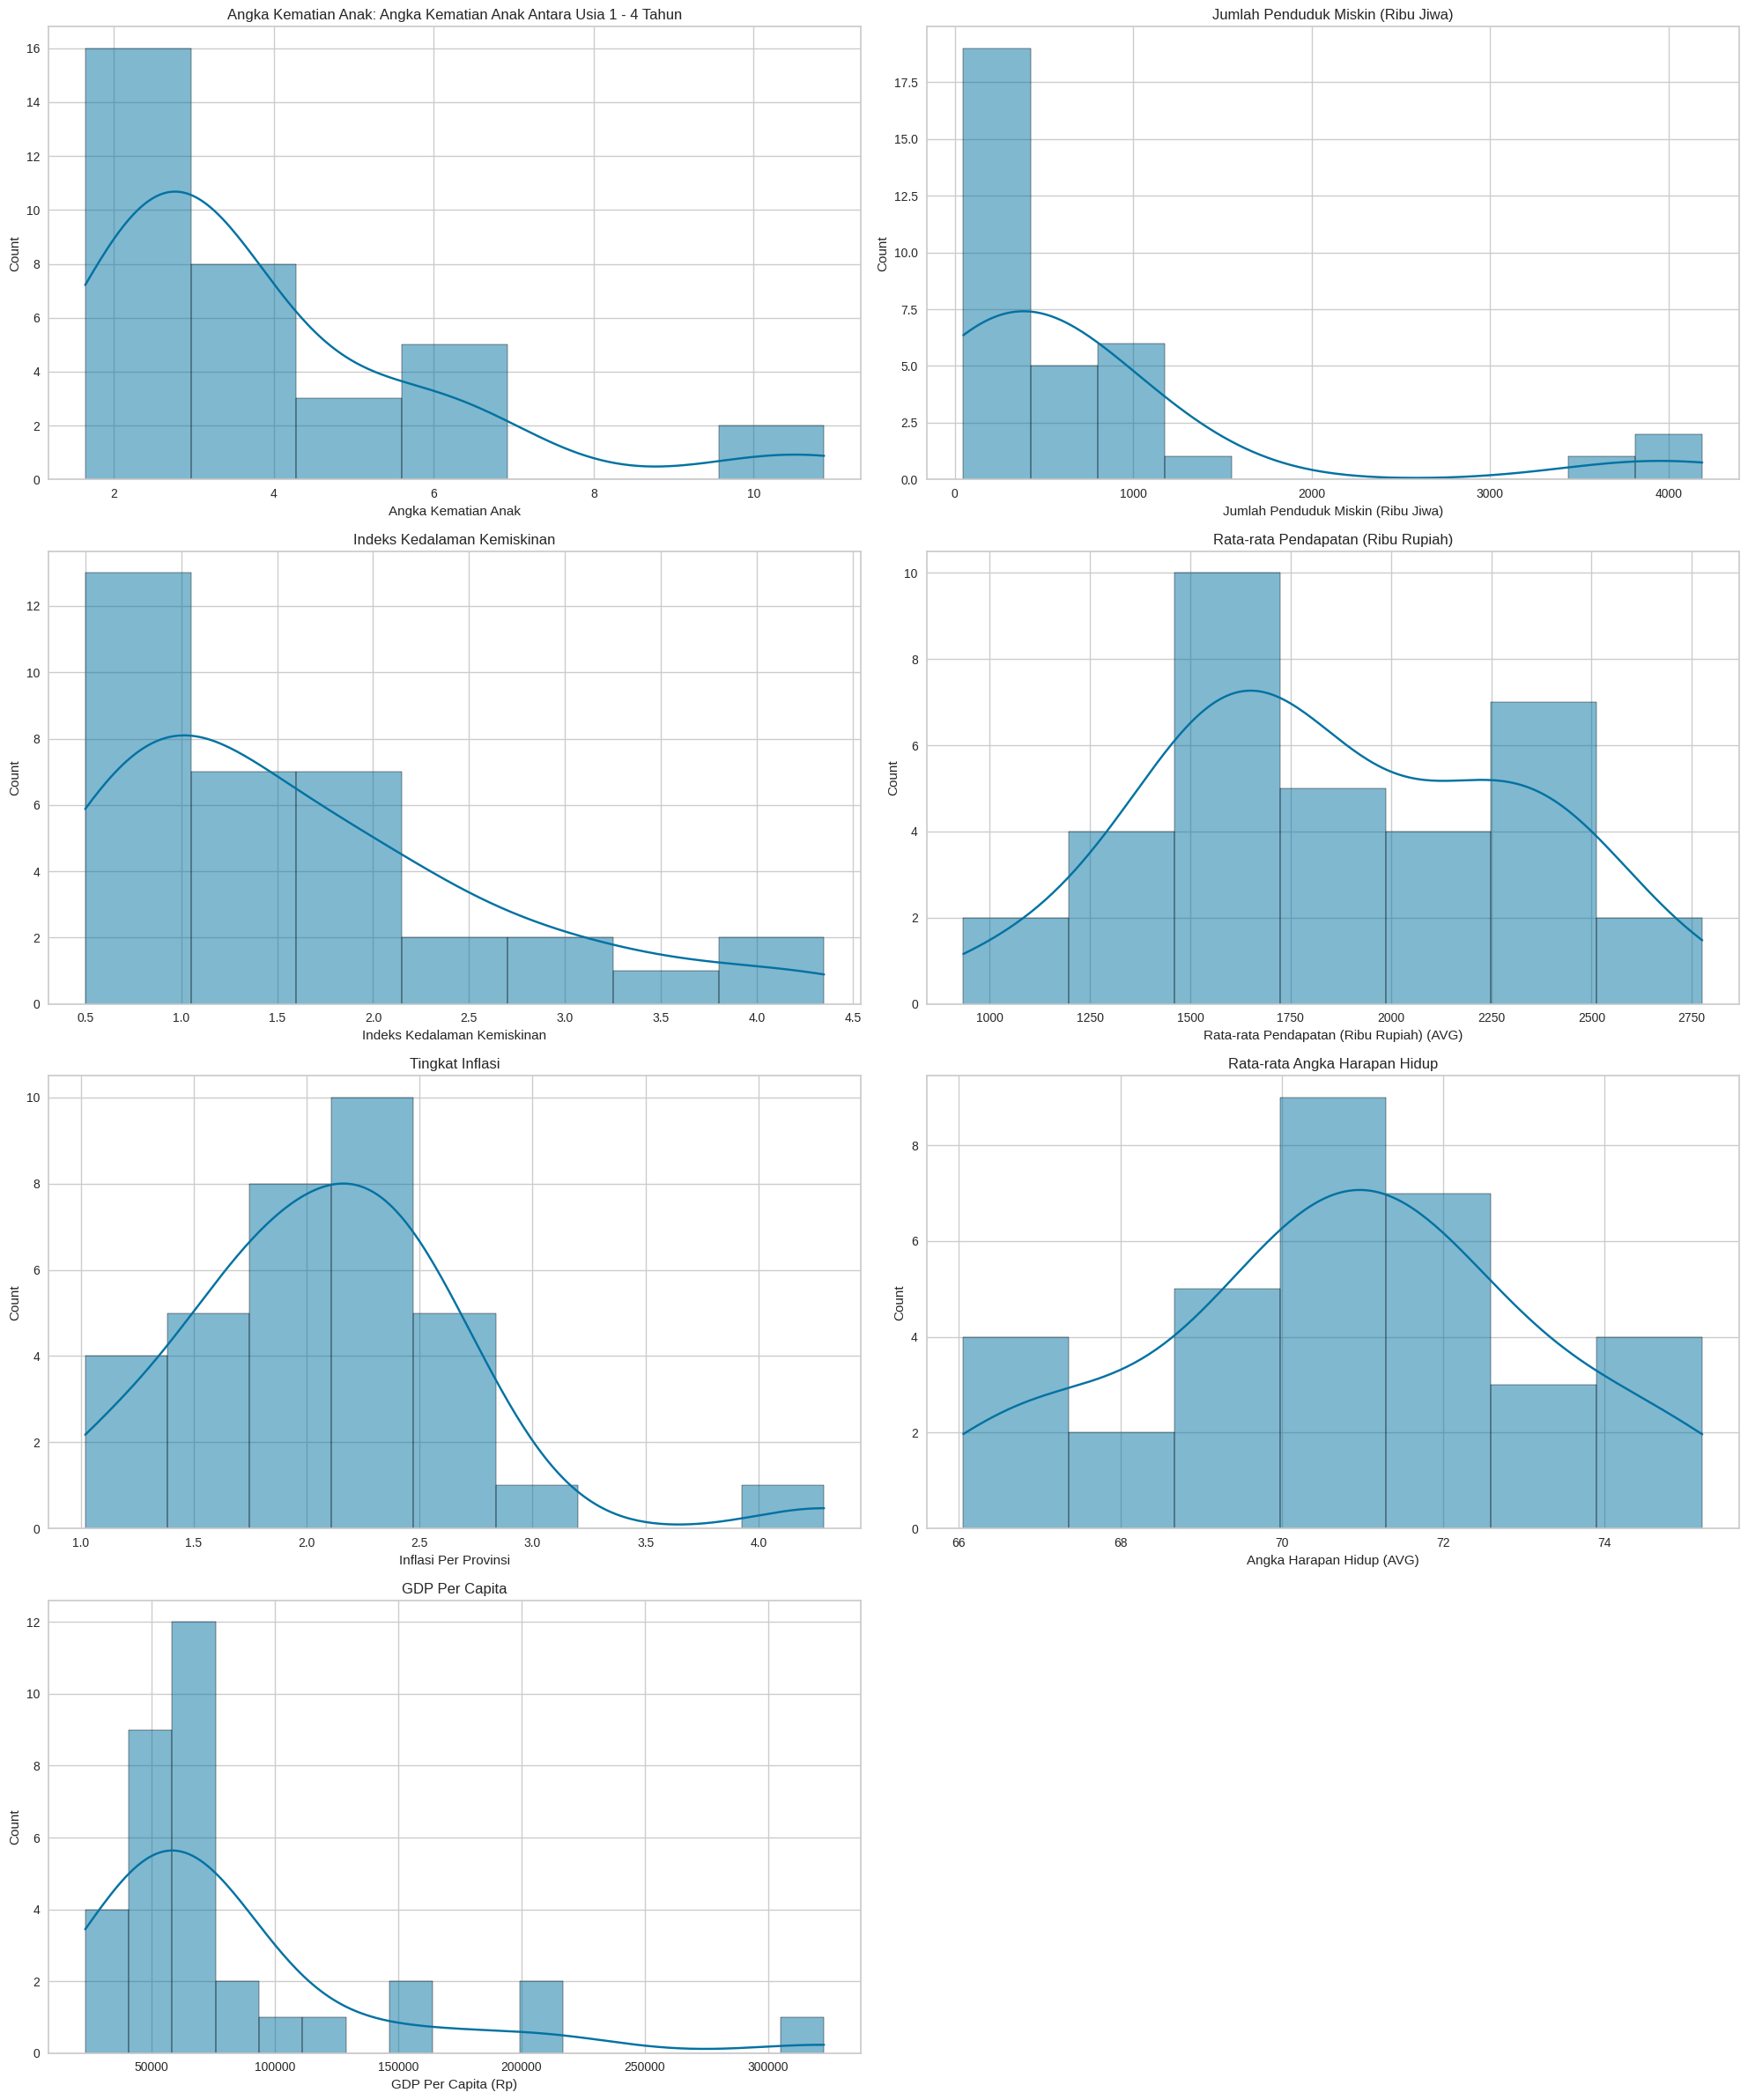

In [ ]:
plt.figure(figsize=(20, 24))

variables = [
    "Angka Kematian Anak",
    "Jumlah Penduduk Miskin (Ribu Jiwa)",
    "Indeks Kedalaman Kemiskinan",
    "Rata-rata Pendapatan (Ribu Rupiah) (AVG)",
    "Inflasi Per Provinsi",
    "Angka Harapan Hidup (AVG)",
    "GDP Per Capita (Rp)"
]

titles = [
    "Angka Kematian Anak: Angka Kematian Anak Antara Usia 1 - 4 Tahun",
    "Jumlah Penduduk Miskin (Ribu Jiwa)",
    "Indeks Kedalaman Kemiskinan",
    "Rata-rata Pendapatan (Ribu Rupiah)",
    "Tingkat Inflasi",
    "Rata-rata Angka Harapan Hidup",
    "GDP Per Capita"
]

for i, (var, title) in enumerate(zip(variables, titles), 1):
    plt.subplot(4, 2, i)
    plt.title(title)
    sns.histplot(df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel("Count")

# Remove the empty subplot
plt.subplot(4, 2, 8).set_visible(False)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

4. Check on Correlation

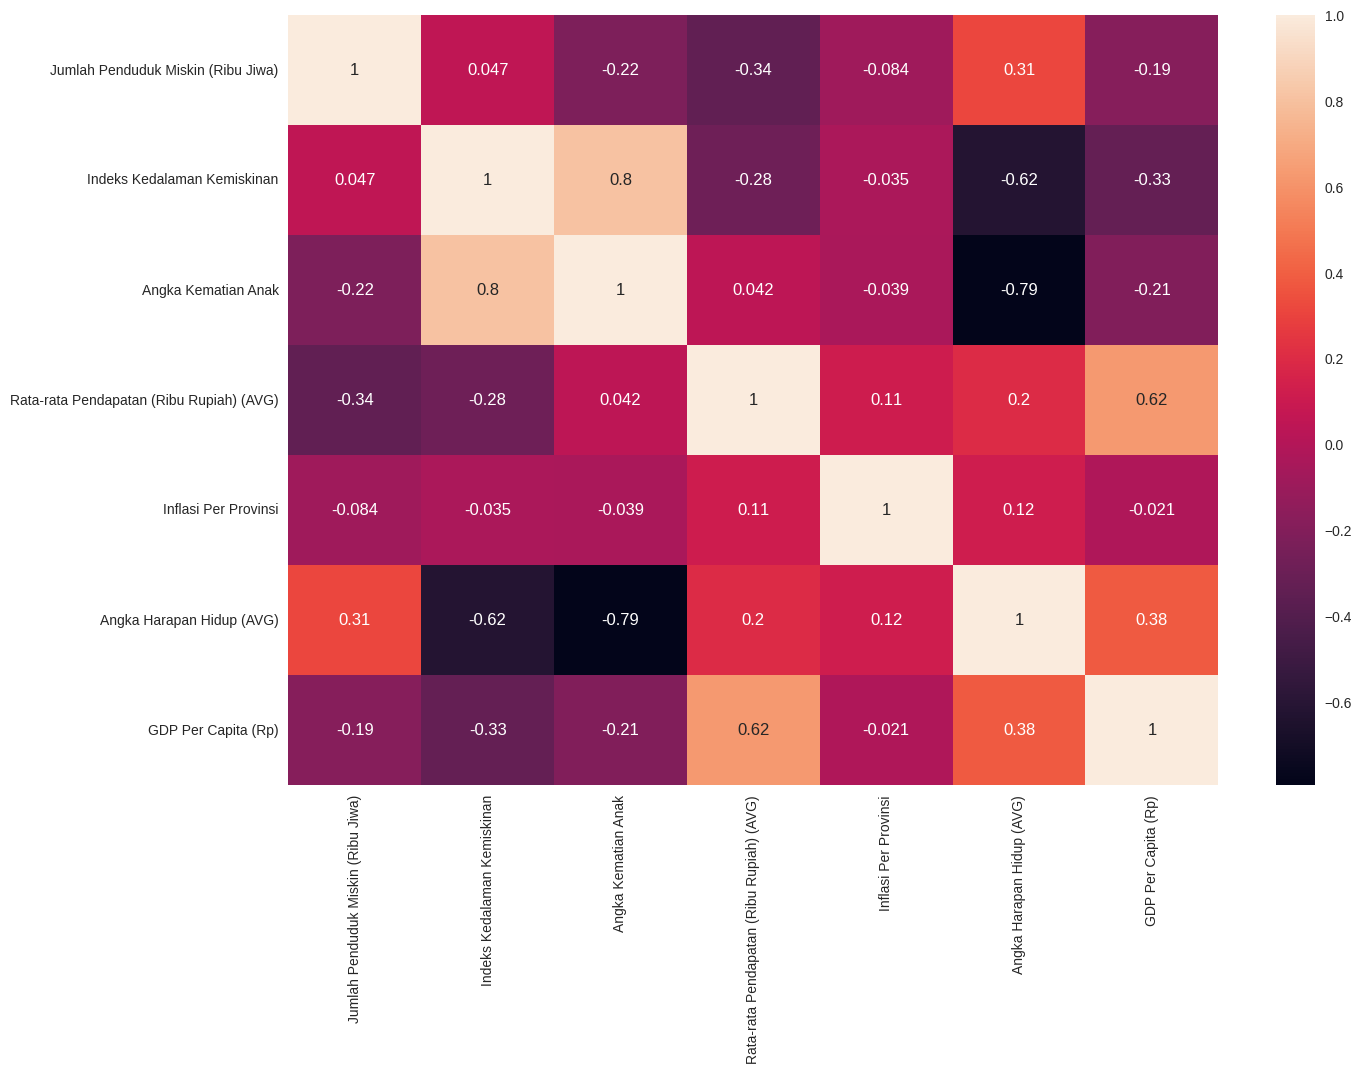

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Generate the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(method='pearson', min_periods=1), annot=True)
plt.show()

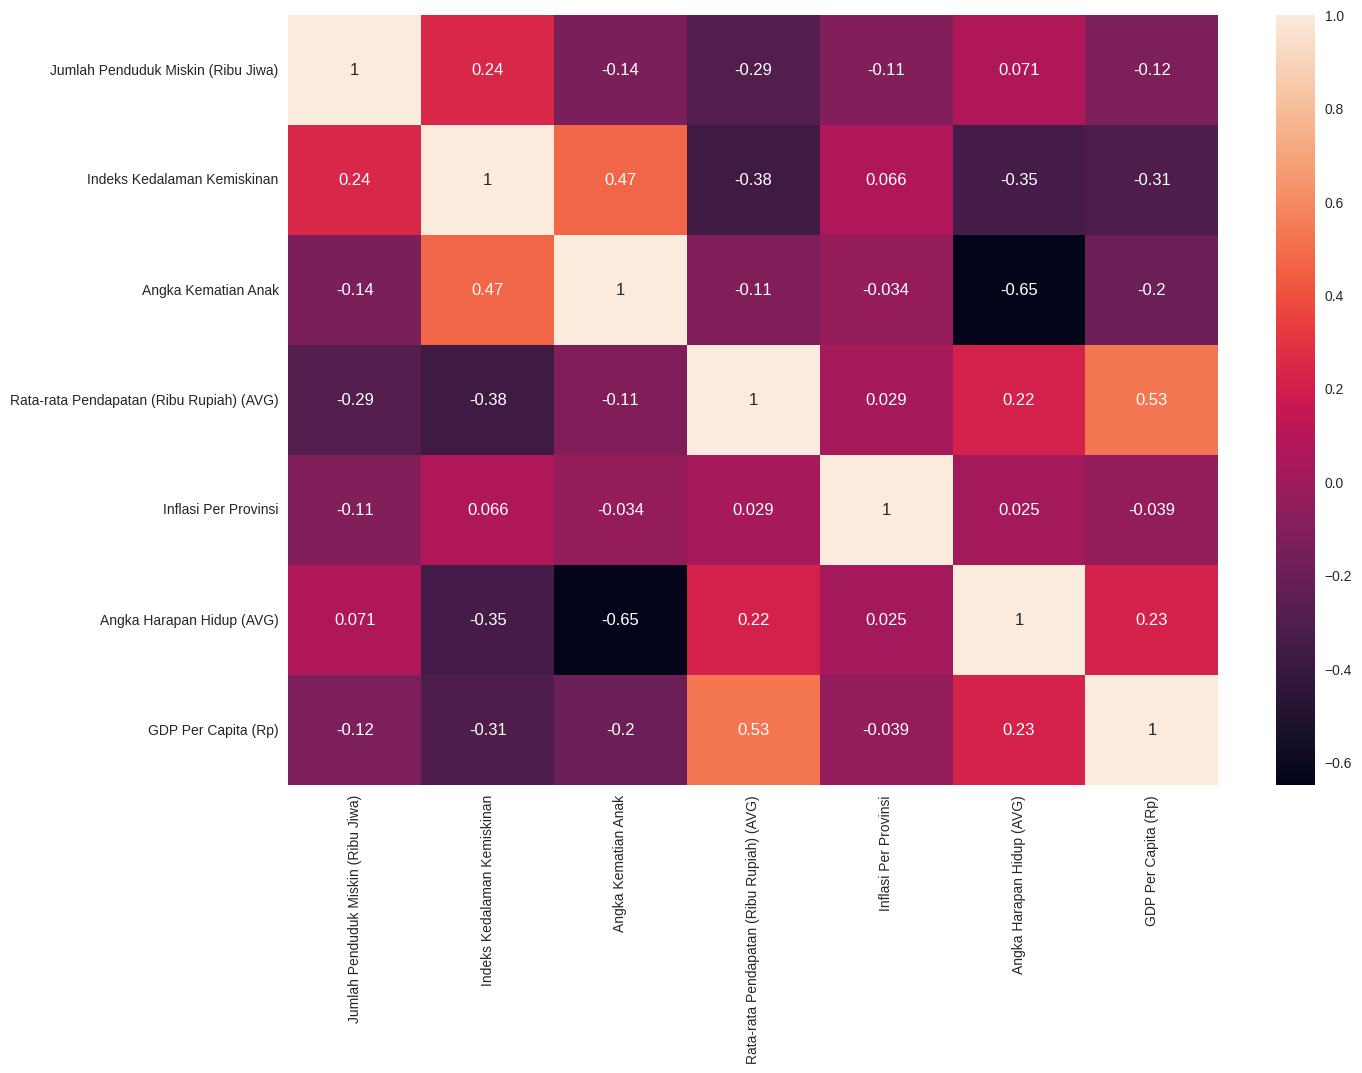

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Generate the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(method='kendall', min_periods=1), annot=True)
plt.show()


there are no high correlation in each varriable so it does not need to do elimination for some variable.

5. Scaling Data

Why scale the data in this case?

1. the features have incomparable units (metrics are percentages, dollar values, whole numbers)
2. the range values of the features also vary (one for example is 0 to 200, and another 0 to 100,000), so here for example, a change of 50 in one feature is quite significant, whereas in another it is almost unnoticeable
3. this level of variance can negatively impact the performance of this model, as this model is based on measuring distances, it can do this by giving more weight to some features
4. by scaling we are removing potential bias that the model can have towards features with higher magnitudes

In [ ]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = df.drop(['Nama Provinsi'], axis =1)
dataset.head()

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp)
0,807,2.62,3.47,1581.30,2.29,70.385,41424
1,1240,1.23,3.10,1641.00,1.86,70.030,68306
2,340,0.74,2.84,1586.05,2.22,70.240,54327
3,486,0.97,2.55,2112.70,1.99,72.285,154522
4,281,1.06,2.99,2101.60,2.50,71.820,79836


In [ ]:
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data
columns = dataset.columns

# the scaler to use will be
scaler = MinMaxScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_minmax = scaler.fit_transform(dataset)
rescaled_dataset_minmax

array([[0.18328906, 0.55064935, 0.19805195, 0.35128678, 0.3883792 ,
        0.47270742, 0.06124786],
       [0.28785318, 0.18961039, 0.15800866, 0.38370073, 0.25688073,
        0.43395197, 0.15099303],
       [0.07051437, 0.06233766, 0.12987013, 0.35386578, 0.36697248,
        0.45687773, 0.10432434],
       [0.10577155, 0.12207792, 0.09848485, 0.63980888, 0.29663609,
        0.680131  , 0.43882392],
       [0.0562666 , 0.14545455, 0.1461039 , 0.63378217, 0.45259939,
        0.62936681, 0.18948577],
       [0.24100459, 0.36103896, 0.12987013, 0.37816267, 0.23853211,
        0.50818777, 0.16315847],
       [0.05795702, 0.41818182, 0.21753247, 0.44076447, 0.40366972,
        0.4268559 , 0.07747624],
       [0.22289302, 0.26753247, 0.10497835, 0.42602346, 0.40061162,
        0.5720524 , 0.08384941],
       [0.00507124, 0.04155844, 0.13852814, 0.74057987, 0.        ,
        0.57041485, 0.14958753],
       [0.02294132, 0.05194805, 0.05194805, 0.82894451, 0.49541284,
        0.5360262 , 0.4

In [ ]:
# in standardisation, all features will be transformed to have the properties of standard normal distribution with mean=0 and standard deviation=1
#
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data
columns = dataset.columns

# the scaler to use will be
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[ 4.31343116e-02,  1.00228338e+00, -1.74149602e-01,
        -6.47793861e-01,  3.25876116e-01, -1.53733044e-01,
        -6.64446037e-01],
       [ 4.56560962e-01, -3.98305402e-01, -3.44507456e-01,
        -5.11571621e-01, -3.74757534e-01, -3.02475156e-01,
        -2.23683603e-01],
       [-4.02755401e-01, -8.92038140e-01, -4.64218380e-01,
        -6.36955408e-01,  2.11819475e-01, -2.14486865e-01,
        -4.52885971e-01],
       [-2.63355191e-01, -6.60286038e-01, -5.97742103e-01,
         5.64743796e-01, -1.62938058e-01,  6.42351498e-01,
         1.18993049e+00],
       [-4.59088363e-01, -5.69600433e-01, -3.95154385e-01,
         5.39416043e-01,  6.68046038e-01,  4.47520281e-01,
        -3.46355089e-02],
       [ 2.71330546e-01,  2.66722367e-01, -4.64218380e-01,
        -5.34845773e-01, -4.72520368e-01, -1.75606884e-02,
        -1.63935879e-01],
       [-4.52404791e-01,  4.88398290e-01, -9.12728087e-02,
        -2.71756590e-01,  4.07345145e-01, -3.29709628e-01,
        -5.8474414

In [ ]:
# minmax
# we need to create a new dataframe with the column lables and the rescaled values
df_minmax = pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )
df_minmax

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp)
0,0.183289,0.550649,0.198052,0.351287,0.388379,0.472707,0.061248
1,0.287853,0.189610,0.158009,0.383701,0.256881,0.433952,0.150993
2,0.070514,0.062338,0.129870,0.353866,0.366972,0.456878,0.104324
3,0.105772,0.122078,0.098485,0.639809,0.296636,0.680131,0.438824
4,0.056267,0.145455,0.146104,0.633782,0.452599,0.629367,0.189486
5,0.241005,0.361039,0.129870,0.378163,0.238532,0.508188,0.163158
6,0.057957,0.418182,0.217532,0.440764,0.403670,0.426856,0.077476
7,0.222893,0.267532,0.104978,0.426023,0.400612,0.572052,0.083849
8,0.005071,0.041558,0.138528,0.740580,0.000000,0.570415,0.149588
9,0.022941,0.051948,0.051948,0.828945,0.495413,0.536026,0.437679


In [ ]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_standard

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp)
0,0.043134,1.002283,-0.174150,-0.647794,0.325876,-0.153733,-0.664446
1,0.456561,-0.398305,-0.344507,-0.511572,-0.374758,-0.302475,-0.223684
2,-0.402755,-0.892038,-0.464218,-0.636955,0.211819,-0.214487,-0.452886
3,-0.263355,-0.660286,-0.597742,0.564744,-0.162938,0.642351,1.189930
4,-0.459088,-0.569600,-0.395154,0.539416,0.668046,0.447520,-0.034636
5,0.271331,0.266722,-0.464218,-0.534846,-0.472520,-0.017561,-0.163936
6,-0.452405,0.488398,-0.091273,-0.271757,0.407345,-0.329710,-0.584744
7,0.199721,-0.096020,-0.570117,-0.333707,0.391051,0.227550,-0.553444
8,-0.661505,-0.972648,-0.427384,0.988242,-1.743437,0.221265,-0.230586
9,-0.590850,-0.932343,-0.795726,1.359602,0.896159,0.089282,1.184307


Text(0, 0.5, 'Indeks Kedalaman Kemiskinan')

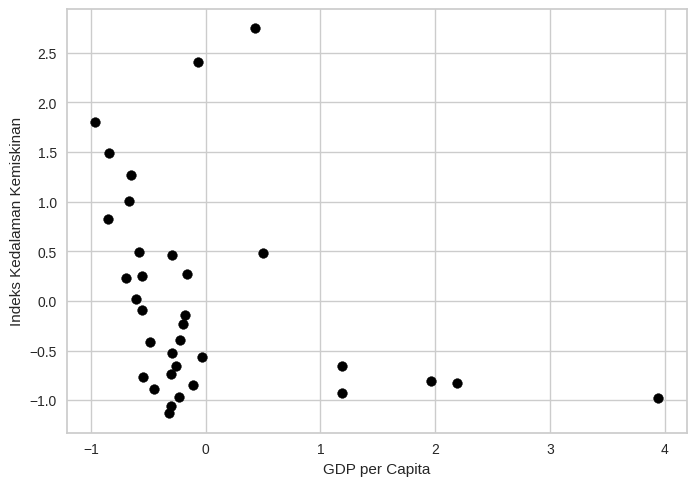

In [ ]:
plt.scatter(df_standard['GDP Per Capita (Rp)'], df_standard['Indeks Kedalaman Kemiskinan'],color = 'black')
plt.scatter

plt.xlabel('GDP per Capita')
plt.ylabel('Indeks Kedalaman Kemiskinan')

Text(0, 0.5, 'Indeks Kedalaman Kemiskinan')

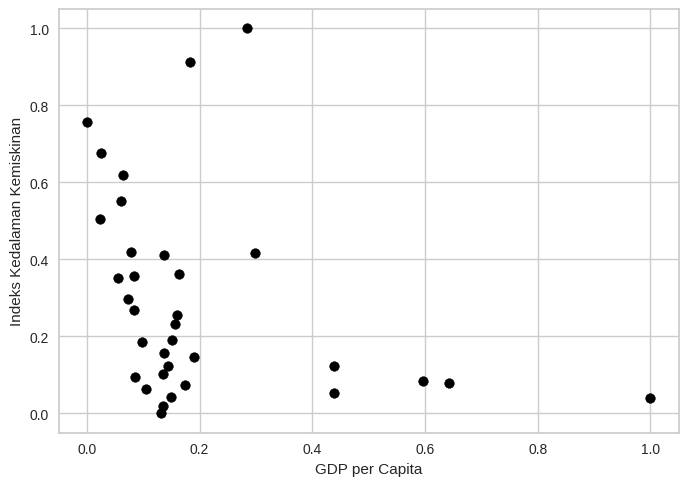

In [ ]:
plt.scatter(df_minmax['GDP Per Capita (Rp)'], df_minmax['Indeks Kedalaman Kemiskinan'],color = 'black')
plt.scatter

plt.xlabel('GDP per Capita')
plt.ylabel('Indeks Kedalaman Kemiskinan')

6. PCA: Principal Component Analysis

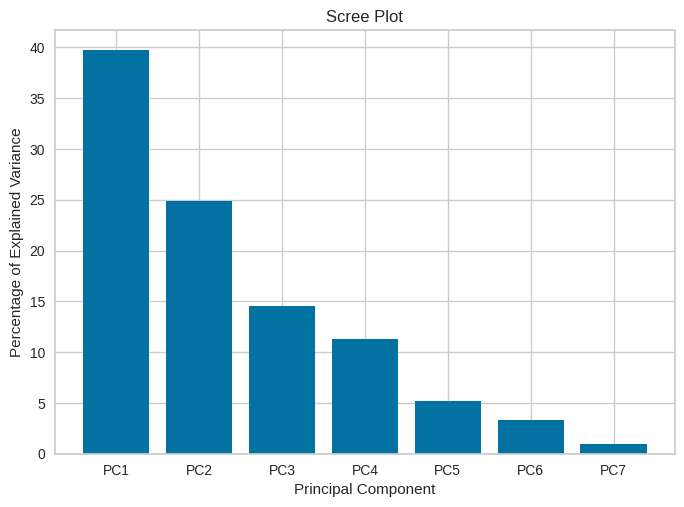

Text(0, 0.5, 'PC2 - 24.9%')

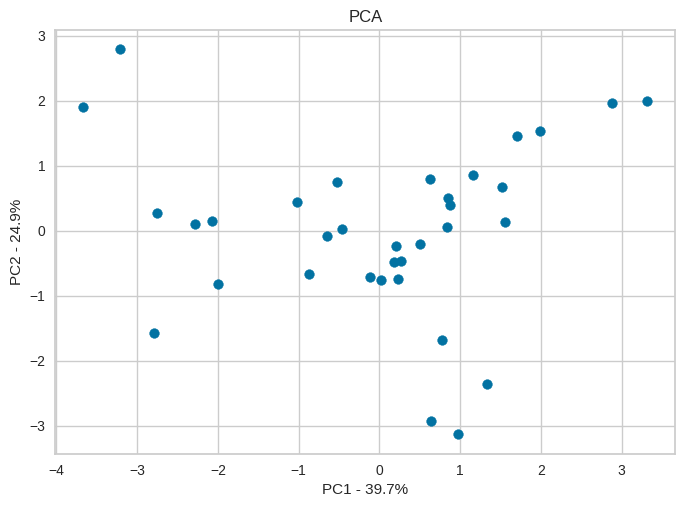

In [ ]:
# PCA with data scaled with standard scaler
# import PCA
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)

# percentage variation
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

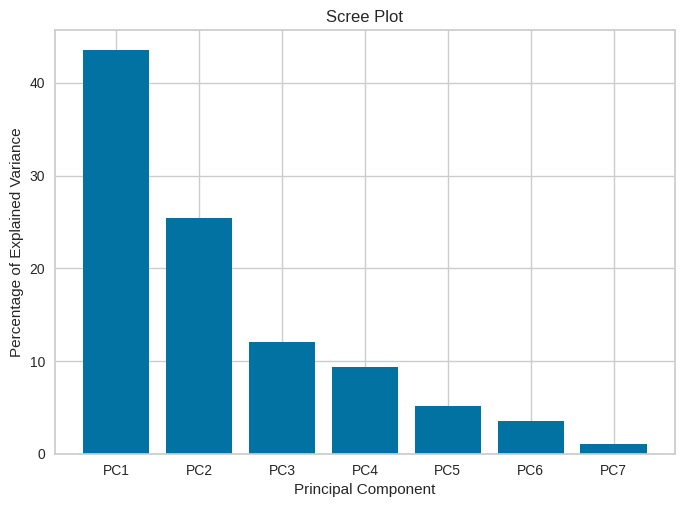

Text(0, 0.5, 'PC2 - 25.4%')

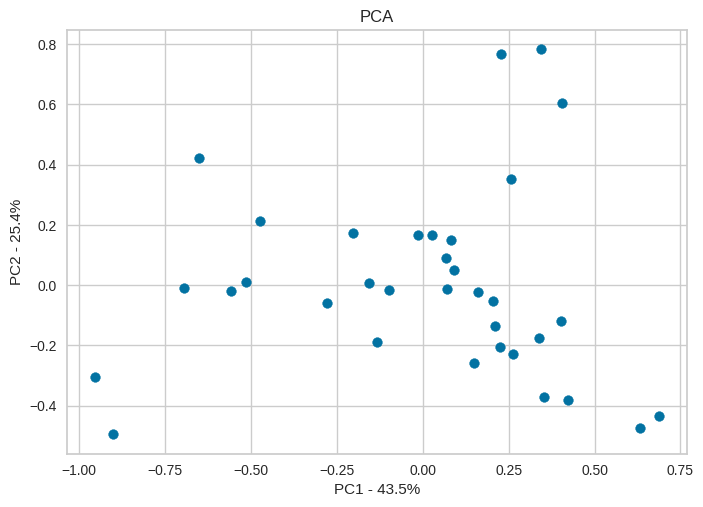

In [ ]:
# PCA with data scaled with minmax scaler
# import PCA
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_data_minmax = pca.transform(df_minmax)

# percentage variation
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca

pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)
plt.scatter(pca_df_minmax.PC1, pca_df_minmax.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [ ]:
# dataframe with PC1, PC2, P3
data2 = pca_df_standard.drop(['PC4','PC5','PC6','PC7'], axis = 1)
data2

,PC1,PC2,PC3
0,-0.876533,-0.667484,0.498373
1,0.023128,-0.752864,-0.345772
2,0.268356,-0.461474,0.371374
3,1.513362,0.669980,-0.396285
4,0.873739,0.400976,0.705263
5,-0.112755,-0.715821,-0.411219
6,-0.648042,-0.080458,0.579464
7,0.227517,-0.739225,0.525169
8,0.849854,0.497897,-1.579917
9,1.709115,1.454198,0.601697


7. Model K-Means Cluster

- Model Set Up

In [ ]:
km = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [ ]:
# normalised dataset
# method to compute the clusters and assign the labels
y_predicted_minmax = km.fit_predict(df_minmax) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_minmax

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
# standardised dataset
# method to compute the clusters and assign the labels
y_predicted_standard = km.fit_predict(df_standard) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_standard

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
# data2 is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the clusters and assign the labels
y_predicted_data2 = km.fit_predict(data2) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_data2

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1], dtype=int32)

In [ ]:
# add the cluster column to the dataframe
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp),cluster
0,0.183289,0.550649,0.198052,0.351287,0.388379,0.472707,0.061248,0
1,0.287853,0.189610,0.158009,0.383701,0.256881,0.433952,0.150993,2
2,0.070514,0.062338,0.129870,0.353866,0.366972,0.456878,0.104324,2
3,0.105772,0.122078,0.098485,0.639809,0.296636,0.680131,0.438824,2
4,0.056267,0.145455,0.146104,0.633782,0.452599,0.629367,0.189486,2


In [ ]:
# add the cluster column to the dataframe
df_standard['cluster'] = y_predicted_standard
df_standard.head()

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp),cluster
0,0.043134,1.002283,-0.174150,-0.647794,0.325876,-0.153733,-0.664446,2
1,0.456561,-0.398305,-0.344507,-0.511572,-0.374758,-0.302475,-0.223684,2
2,-0.402755,-0.892038,-0.464218,-0.636955,0.211819,-0.214487,-0.452886,2
3,-0.263355,-0.660286,-0.597742,0.564744,-0.162938,0.642351,1.189930,2
4,-0.459088,-0.569600,-0.395154,0.539416,0.668046,0.447520,-0.034636,2


In [ ]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
dataset['cluster'] = y_predicted_data2
dataset.head()

,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp),cluster
0,807,2.62,3.47,1581.30,2.29,70.385,41424,2
1,1240,1.23,3.10,1641.00,1.86,70.030,68306,2
2,340,0.74,2.84,1586.05,2.22,70.240,54327,2
3,486,0.97,2.55,2112.70,1.99,72.285,154522,0
4,281,1.06,2.99,2101.60,2.50,71.820,79836,2


- Optimal number of cluster: Elbow Method

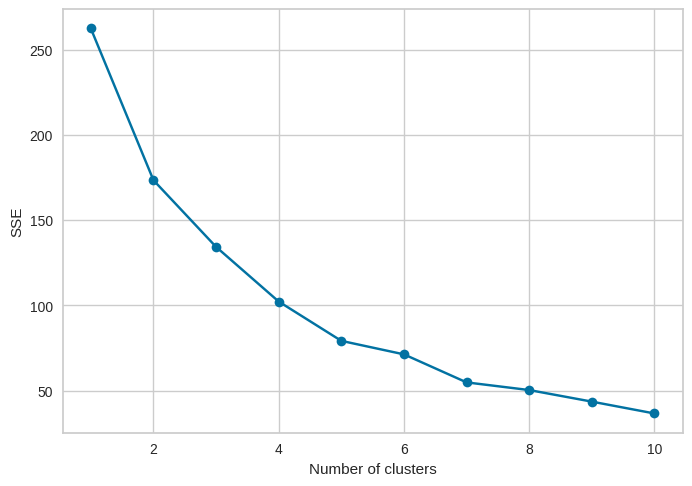

In [ ]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_standard)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

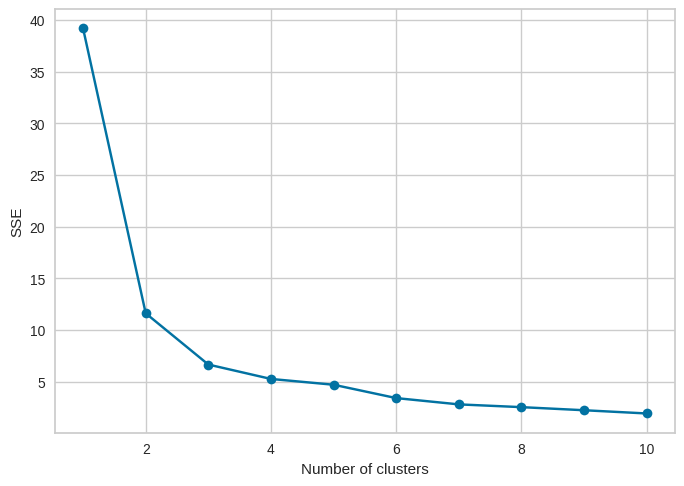

In [ ]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with MinMax

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_minmax)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

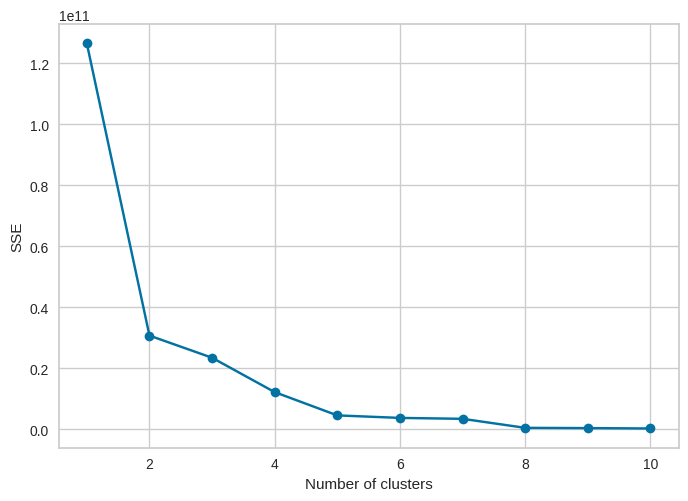

In [ ]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

8. Cluster Analysis

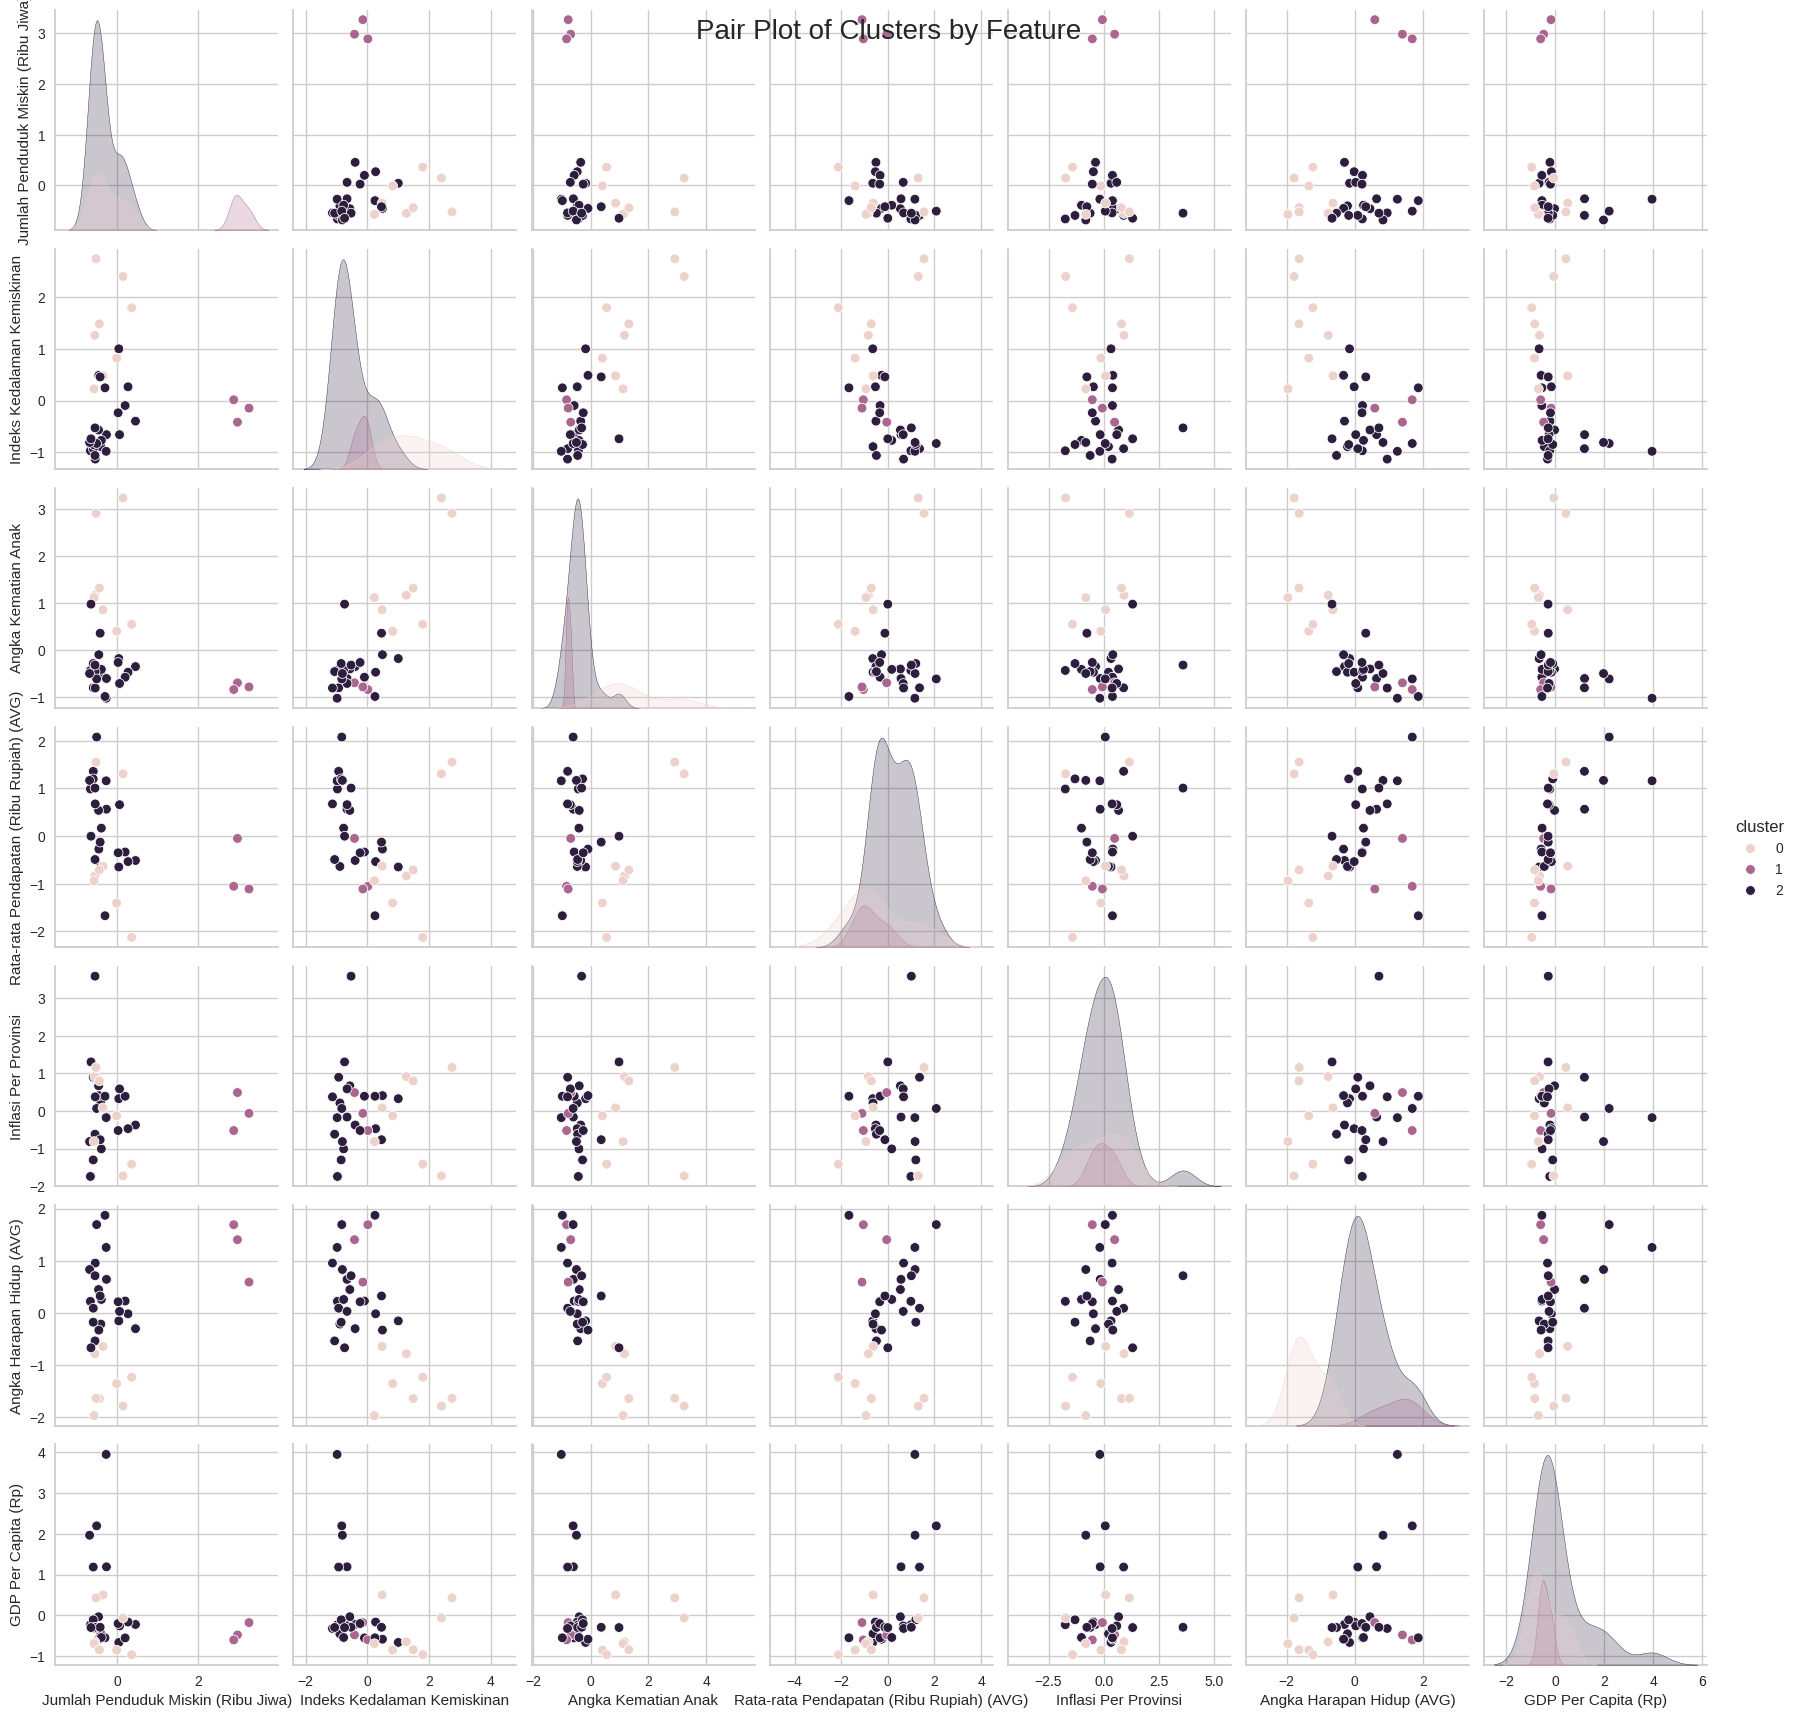

In [ ]:
# load example dataset from seaborn
sns.get_dataset_names()

# plot
sns.load_dataset('penguins')
sns.pairplot(df_standard, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature',
             size = 20);

In [ ]:
# add cluster column to original dataset with countries and non-scaled values
df['cluster'] = y_predicted_standard.tolist()
df

,Nama Provinsi,Jumlah Penduduk Miskin (Ribu Jiwa),Indeks Kedalaman Kemiskinan,Angka Kematian Anak,Rata-rata Pendapatan (Ribu Rupiah) (AVG),Inflasi Per Provinsi,Angka Harapan Hidup (AVG),GDP Per Capita (Rp),cluster
0,Aceh,807,2.62,3.47,1581.30,2.29,70.385,41424,2
1,Sumatera Utara,1240,1.23,3.10,1641.00,1.86,70.030,68306,2
2,Sumatera Barat,340,0.74,2.84,1586.05,2.22,70.240,54327,2
3,Riau,486,0.97,2.55,2112.70,1.99,72.285,154522,2
4,Jambi,281,1.06,2.99,2101.60,2.50,71.820,79836,2
5,Sumatera Selatan,1046,1.89,2.84,1630.80,1.80,70.710,71950,2
6,Bengkulu,288,2.11,3.65,1746.10,2.34,69.965,46285,2
7,Lampung,971,1.53,2.61,1718.95,2.33,71.295,48194,2
8,Kep. Bangka Belitung,69,0.66,2.92,2298.30,1.02,71.280,67885,2
9,Kepulauan Riau,143,0.70,2.12,2461.05,2.64,70.965,154179,2


In [ ]:
# cluster 0
cluster_0 = df.loc[df['cluster'] == 0]

# list of countries in this country
cluster_0['Nama Provinsi'].unique()

array(['Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Sulawesi Tengah',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Papua Barat', 'Papua'],
      dtype=object)

In [ ]:
# cluster 1
cluster_1 = df.loc[df['cluster'] == 1]

# list of countries in this country
cluster_1['Nama Provinsi'].unique()

array(['Jawa Barat', 'Jawa Tengah', 'Jawa Timur'], dtype=object)

In [ ]:
# cluster 2
cluster_2 = df.loc[df['cluster'] == 2]

# list of countries in this country
cluster_2['Nama Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kep. Bangka Belitung',
       'Kepulauan Riau', 'DKI Jakarta', 'DI Yogyakarta', 'Banten', 'Bali',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Selatan', 'Sulawesi Tenggara', 'Maluku Utara'],
      dtype=object)